In [ ]:
%pip install nltk

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf.p')

In [9]:
df.shape

(940, 5)

In [11]:
df = df.drop(['_id', ], axis=1)


In [14]:
df = df.set_index(['cleaned_name'])

In [15]:
df.sample(8)

,cleaned_geo,cleaned_text,class
cleaned_name,,,
mohamed22hamo,None,* الساعه - ازيك يا محمد -- لا محمد ايه قوليلى ...,EG
typicallynorah,United Arab Emirates,: على الاقل ارحم من ان تتعود على وجود احد ويغر...,GULF
AbooodXQ,"Gaza, Palestine",: مرة شوية رز حبو يسلمو على مديرهم قالوله ازيك...,EG
Ahmed30MAr,Egypt,اثبتت الدراسات العلميه ان اسرع طريقه للنوم هي ...,EG
EL_OSTAZA_,Egypt,الجو دا محتاج لحاف تقيل و كوباية نسكافيه و تكل...,EG
Moood,None,إنها مغسلة سيارات,GULF
shlhob2_shlhob,Saudi Arabia,: ازيك يا صلاح واحشتني,EG
Medhaat74,Egypt,ورقة وقلم و بحر و الاغانى بتاعتى و ازازة ابسلي...,EG


### Label Encode the Categories


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

In [19]:
df.shape

(940, 4)

In [20]:
df.sample(8)

,cleaned_geo,cleaned_text,class,class_numerical
cleaned_name,,,,
loumylamouni1,None,: شيل البوتاغاز من جنب مغسلة المواعين عشان نبع...,GULF,1
muharraq77,Muharraq - Bahrain,: يالله يا جماعة دلونا الطريج ‍️,GULF,1
alka__96,🇰🇼 | 🇬🇧,من صجج احس بينزلني بنص الطريج,GULF,1
ghzlan12345,None,اخوان سته كلنا نمشي بنفس الطريج 🇦🇪️🇧🇭️🇸🇦️🇴🇲️🇶🇦️🇰🇼,GULF,1
bebosobhy123,الدور الرابع,يسقط العالم وتحيا كوباية الشاي بالنعناع,EG,0
hadeelnasser34,Saudi Arabia,: تقريباً كان قبل سنوات .. يوم مانساه!,GULF,1
saud77311,None,": أعتقد ان أول جامعة ""غسلت"" شهادة من نوع هي جا...",GULF,1
Mo2men_Mo5tar,"Tanta, Egypt",ازيك يا صاحبي واحشني جدا و الله -طب متيجي نتقا...,EG,0


In [21]:
df.class_numerical.unique()


array([0, 1])

### Prepare Document Term Matrix


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)


### TFIDF

In [27]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [28]:
document_term_matrix_sps


<940x4297 sparse matrix of type '<class 'numpy.float64'>'
	with 9954 stored elements in Compressed Sparse Row format>

In [29]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

In [30]:
pd.concat([df.cleaned_text, document_term_matrix_df], axis=1).sample(10)

,cleaned_text,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
cleaned_name,,,,,,,,,,,,,,,,,,,,,
Remao444,: يبه شلونك ؟ ملل هالكون من دونك تهزمني الدمعة...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moood,إنها مغسلة سيارات,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shemo5295,طب م تقولي ازيك ف المايك كده يا صخره,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mamdoh590370651,ازيك يااسكر ازيك ياعسل عامله ايه,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M7mdd_3del,صحيت اتعشيت و شربت سجارة و كوباية الشاي، ارجع ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rehamamr97,كوباية الشاي بلبن الصبح,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EngnrFaisal,: عرض خاص لأعضاء جمعية المهندسين الكويتية من م...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dahan_Co,كرسي + مغسلة موديل فلورا مرخم بأكثر من لون ب ر...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
majed9064,عسروج في معده عنز متوفيه صارلها إسبوع طايحه ع ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute SVD of Document Term Matrix

In [31]:
from sklearn.decomposition import TruncatedSVD

In [32]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [33]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)


In [34]:
SVD.explained_variance_ratio_


array([ 0.01409849,  0.01252813])

In [35]:
svd_matrix[:4]


array([[ 0.01108769,  0.00537359],
       [ 0.0236545 ,  0.00827522],
       [ 0.00965105,  0.00521715],
       [ 0.01853978,  0.00601777]])

### Load SVD Matrix with Documents and Labels


In [41]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [39]:
df.cleaned_text

cleaned_name
kamal              أزاي أقول لك كنا زمان ... والماضي كان فى الغيب...
agabdelrehim       هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو م...
ElsndubadE         أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد...
h_sawires          أزاي الناس كانت بتغرد في الخمسينات قبل إختراع ...
Hagerelmor         التوينز اللي معاها كل الحلو والوحش والمصايب وا...
YaraHossamElDin    : عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر...
weaamaboelwafa1                   شوفت لما تجاهلت الناس وشك نور أزاي
hjjarr             ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليو...
amira_ashraf97     أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صدي...
YasmeenShabana2    اكيد مكنتيش هتقدري تعيشي ي بنتي ، انتي م غيري ...
trbdKnADYIRSP7                                 الله اكبر رووووووووعه
i_asam             أول مرة أسمع أغنية رق الحـبيب لأم كلثـوم كـامل...
rehamaboelhamed    : أول مرة أسمع أغنية رق الحـبيب لأم كلثـوم كـا...
mahmoud_s58                      أزاي يعني واحد يكون مجرم ويطلع براة
Mn3m_reda          ال

In [42]:
latent_semantic_analysis.sample(4)


,component_1,component_2,cleaned_text,class
cleaned_name,,,,
HamdyMagdy140,0.016422,0.008503,كوباية شاي بلبن و سورة يوسف بصوت الشيخ محمود ا...,EG
aleid_t,0.135003,-0.003171,هلاا بك نايف ازيك ي قميل,EG
ab_aljaafari,0.012311,0.006418,بعض الإخوانيين وجوههم مغسلة بمرق.. والله ما يس...,GULF
Dahan_Co,0.013447,0.020420,كرسي + مغسلة موديل فلورا ، متوفر بأكثر من لون ...,GULF


In [43]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [46]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component

Top 10 Terms for Component 1

In [47]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
ازيك,0.851860,-0.019378,0.851860,0.019378
يا,0.361040,-0.006833,0.361040,0.006833
rice,0.073530,-0.001390,0.073530,0.001390
ايه,0.073049,-0.000439,0.073049,0.000439
انا,0.071393,0.008345,0.071393,0.008345
على,0.070657,0.008123,0.070657,0.008123
رز,0.064986,-0.001175,0.064986,0.001175
مديرهم,0.062328,-0.001152,0.062328,0.001152
شوية,0.062170,-0.001078,0.062170,0.001078
مش,0.057406,0.002645,0.057406,0.002645


Top 10 Terms for Component 2


In [48]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
شطاف,0.002479,0.423237,0.002479,0.423237
ضمان,0.002270,0.376150,0.002270,0.376150
شاور,0.002174,0.365834,0.002174,0.365834
مع,0.013609,0.320185,0.013609,0.320185
مسطرة,0.001873,0.317055,0.001873,0.317055
صاعد,0.001675,0.284360,0.001675,0.284360
داليا,0.001240,0.211619,0.001240,0.211619
كاديا,0.001240,0.211619,0.001240,0.211619
سنتين,0.001240,0.211619,0.001240,0.211619
سنوات,0.002162,0.210773,0.002162,0.210773


### Plot Top Two Components


(-0.5, 1)

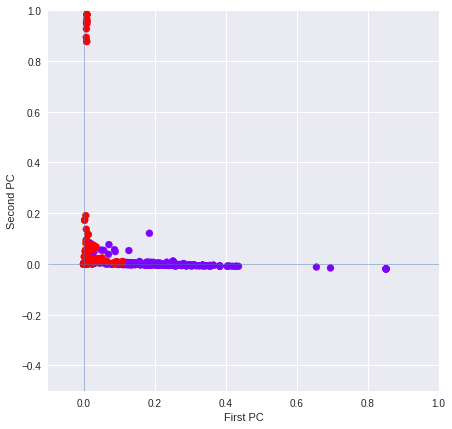

In [52]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

(-0.1, 1)

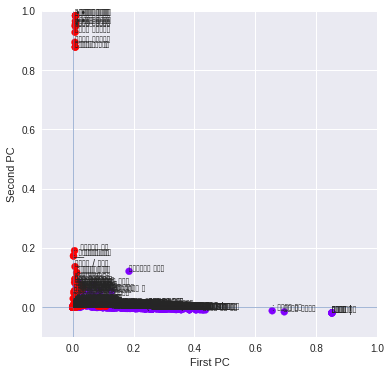

In [53]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.3, 0.6)

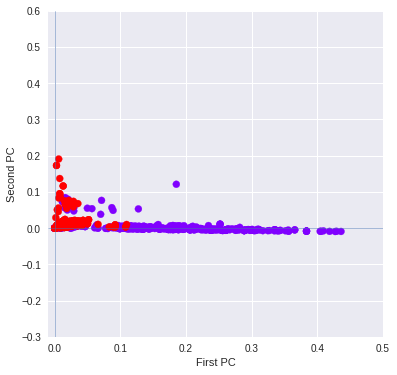

In [54]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)